In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Import training and testing dataset and making a copy of the two of them 

In [31]:
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")
ctest  = test.copy()
ctrain = train.copy()

In [32]:
ctrain['train']  = 1
ctest['train']  = 0
df = pd.concat([ctrain, ctest], axis=0,sort=False)

### 1.discovering dataset

In [33]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


 * we have 81 Columns in this dataset ,80 of them are features(id is only used in submission)

* our dataset is of lenght of 1460(small)==>
training this small dataset(in term of length) with 80 features can lead to overfitting so we need to drop as much possible columns as we can 
* our target is SalesPrice


### 2.data Preprocessing

#### 2.1 dealing with missing values 

In [34]:
thresh=0.6
# Create a boolean mask on whether each feature less than 60% missing values.
mask = df.isna().sum() / len(df) > thresh

missing_ratio=tuple(zip(df.loc[:,mask].columns,(df.isna().sum()/df.shape[0])[mask]))

print(missing_ratio)


(('Alley', 0.9321685508735869), ('PoolQC', 0.9965741692360397), ('Fence', 0.8043850633778691), ('MiscFeature', 0.9640287769784173))


In [43]:
to_drop=[]
to_drop+=list(df.loc[:,mask].columns)
print(to_drop)
df.drop(to_drop,axis=1,inplace=True)

[]


separate categorical and numerical features to deal with each separately

In [91]:
categ = df.select_dtypes(include=['object'])
num =df.select_dtypes(exclude=['object'])

#### preprocessing categorical features 

dropping categorical features where one categorie(option) is dominant meaning have a frequency of more than 95% comparing to the other options 

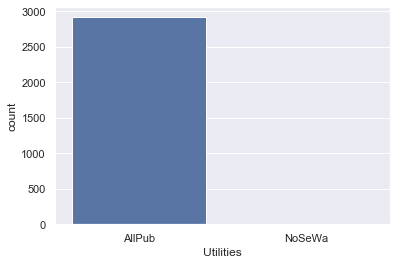

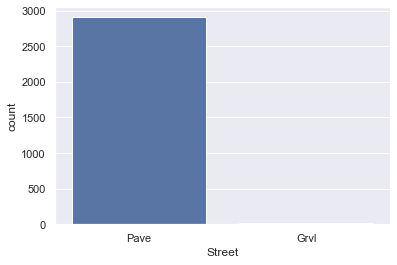

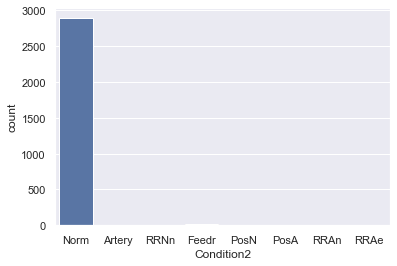

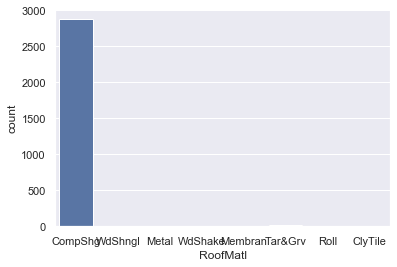

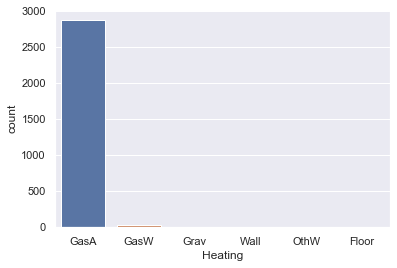

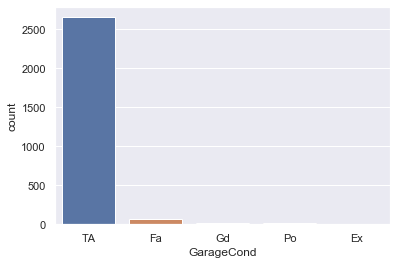

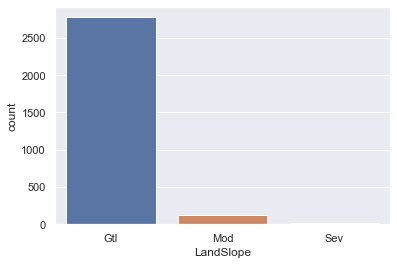

In [92]:
ratio=(categ.describe().loc["freq"]/categ.describe().loc["count"]).sort_values(ascending=False)
drop_freq=list(ratio[ratio>0.95].index)
to_drop=[*to_drop,*drop_freq]

sns.set(style="darkgrid")
for elt in drop_freq:
    ax = sns.countplot(x=elt, data=categ)
    plt.show()


In [93]:

print("list of features dropped due to one option domination is")
print(drop_freq)
categ.drop(drop_freq,axis=1,inplace=True)

list of features dropped due to one option domination is
['Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating', 'GarageCond', 'LandSlope']


##### imputing missing values in categoriacl features

In [94]:
null_counts = categ.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            4
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
RoofStyle           0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


In [95]:
#missing values in columns in the list below are filled with 'None' (see documentation)
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu']
categ[columns_None]=categ[columns_None].fillna('None')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [96]:
#missing values in the rest of the columns  are filled with the most frequent value(median)
categ=categ.fillna(categ.mode().iloc[0])

now we have no missing values in categorical features 

In [97]:
print(categ.isnull().sum())

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


#### preprocessing Numerical Features

In [99]:
num['Age_m']=(num["YrSold"]-num["YearBuilt"])*12+num["MoSold"]
print((num["YearBuilt"]==num["YearRemodAdd"]).sum())
#num.drop(["YrSold","YearBuilt","MoSold"],axis=1,inplace=True)

1560


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 we start by dropping features with low variance (less than 10**(-3)) after normalizing them  

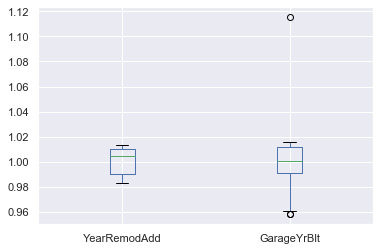

In [84]:
normalized_df = num/ num.mean()
normalized_df.loc[:,normalized_df.var()<10**(-3)].boxplot()
plt.show()


In [ ]:
we can see that this features are 

In [123]:
# drop features with low variance
num.drop(list(num.loc[:,normalized_df.var()<10**(-3)].columns),axis=1,inplace=True)
print(num.shape)

(2919, 35)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
